# RMA (Return Merchandise Authorization) Prediction assignment

**Welcome to 'RMA Prediction' assignment, Below is a brief background:**

Return merchandise authorization (RMA) is the process of returning a product to receive a refund, replacement, or repair during the product's warranty period. 

In the chip manufacturing industry, in particular, the manufacturers have an interest in detect these units before it being shipped and reach the market for a few reasons:

- The cost of a single unit during production is nil, compared to replacing an entire end device that causes several times more damage

- The damage done to a company's reputation when a new device is returned as bad one can be very significant

- A malfunctioning unit can cause significant damage (you don't want such bad unit placed in ABS system of your car :) )

There are detailed test programs in which thousands of tests are performed on chips during production to ensure quality and prevent such cases.

RMA units along with non-RMA units have passed all test cycles properly, and yet have been found to be defective in the field.

The manufacturers are aware that there are such units and their goal is to predict which units will be malfunctioning soon even though they now appear to be working properly. Once predicting such units, they will mark them as bad and not ship them to customers.
Secondary goal is to avoid excessive scrap of good units by marking good units as bad to avoid significant financial loss.


This use case is called "RMA Prediction" and this is the challenge you are required to deal with in this assignment!

**Technical notes:**

- Please follow the steps in this notebook

- Please write all your code inside this notebook only

- Please feel free to add more cells as you need

- The goal of this assigment is not only the best model:
    - There is also value in clean code, and in orderly and clear work
    - Use visualizations and comments on the reasons for the actions you take
    - It is recommended to show in the notebook also experiments you tried along the way


- Avoid over-fitting

    - Your prediction results will be tested on a test set that its lables are not available to you


Good Luck!

# Packages

First, import all the packages you'll need during this assignment. You can finish successfully this assigment with these packages only but feel free to use more libraries if you find it helpful

- [numpy](www.numpy.org) is the main package for scientific computing with Python.
- [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- [sklearn](https://scikit-learn.org/stable/) is the most useful and robust library for machine learning in Python.
- [f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) Is the metric you should use to evaluate the performance of your model.
- [pickle](https://docs.python.org/3/library/pickle.html) is a library for serializing and de-serializing Python object structures, also called marshalling or flattening
- np.random.seed(1) is used to keep all the random function calls consistent. It helps grade your work. Please don't change the seed! 

In [325]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition, tree, naive_bayes, neighbors, svm
from sklearn.metrics import f1_score
from sklearn.inspection import permutation_importance
import pickle
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

np.random.seed(seed=1)

# Load The Data

First, let's load the data:

In [326]:
url_data_train = (r'https://raw.githubusercontent.com/NI-DS/rma_assignment/main/Input/rma_train_data.csv')
url_data_test = (r'https://raw.githubusercontent.com/NI-DS/rma_assignment/main/Input/rma_test_data.csv')
df_rma_train, df_rma_test = pd.read_csv(url_data_train), pd.read_csv(url_data_test)

We will now examine the dimensions of the data:

In [327]:
df_rma_train.shape, df_rma_test.shape

((3616, 17), (905, 16))

It can be seen that in the train set there is one column more than the test set.

We will now print the first five rows of the DataFrame to see the values of the data.

In [328]:
df_rma_train.head()

,Test_0,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12,Test_13,Test_14,Test_15,RMA
0,261.36,E,Low,OP-1,True,102.14,False,True,2018.0,58.9,nov,136,1,120,1,TP-1549,False
1,268.62,H,Mid,OP-17,True,655.42,False,True,2018.0,62.0,apr,114,1,152,2,TP-1549,False
2,297.66,F,Low,OP-1,True,605.50,False,False,2018.0,65.1,nov,285,3,116,4,TP-1549,False
3,515.46,NaN,Low,OP-17,True,144.78,True,True,2018.0,83.7,jan,208,1,93,2,TP-1549,False
4,290.40,D,Low,OP-4,True,416.22,False,True,2019.0,37.2,may,58,2,334,1,TP-1549,False


In [329]:
df_rma_test.head()

,Test_0,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12,Test_13,Test_14,Test_15
0,268.62,C,Low,OP-17,True,1116.14,False,True,2018.0,6.2,feb,289,2,174,4,TP-9941
1,268.62,D,Low,OP-4,True,53.00,False,True,2018.0,18.6,may,226,1,363,3,TP-9941
2,246.84,D,Low,OP-1,True,275.56,False,True,2018.0,62.0,apr,470,1,150,5,TP-9941
3,333.96,B,Low,OP-1,True,53.00,False,True,2018.0,68.2,jun,154,1,124,1,TP-9941
4,261.36,B,Mid,OP-1,True,438.32,False,True,2018.0,55.8,nov,177,2,174,1,TP-9941


As you can see there are 16 independent variables all 'Test_i' (i: 0-15) columns, and one variable is dependent, 'RMA' column.

The purpose of the assignment is to predict the value of the 'RMA' variable according to the value of the other variables in the data. Please remember to use visualizations, explain the actions you perform by comments, and show your workflow clearly.

Note that the test set has no labels. Your assignment goal is to build a machine learning model that will predict the labels for it.

# Exploratory Data Analysis (EDA)

## What is EDA? 

Exploratory Data Analysis: this is unavoidable and one of the major step to fine-tune the given data set(s) in a different form of analysis to understand the insights of the key characteristics of various entities of the data set like column(s), row(s) by applying Pandas, NumPy, Statistical Methods, and Data visualization packages. EDA process should make you familiar with your data set.

- Outcome of this phase can be but not limited to:

    - Dataset charechtaristics.
    - Features relationship.
    - Target ('RMA' column) insights. 
    - Any interesting thing you can learn about the dataset.
    
**Goal of this phase is to implement EDA process for RMA data set**

In [330]:
dft = df_rma_train
dft = dft.rename(columns={"RMA":"Y"})
title_size = 20

☝ First I've renamed the dataframe and the traget column. 



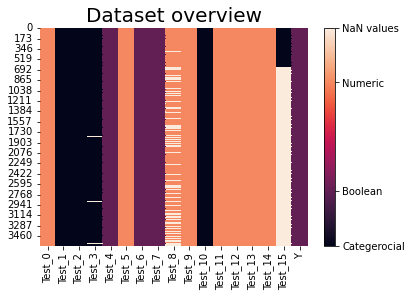

In [331]:
heatmap = dft.isnull()

for k,v in dft.dtypes.items():
 if v == "float64" or v == "int64":
   heatmap[k] = heatmap[k].apply(lambda x: 0.75 if x is False else 1)
 elif v == "bool":
   heatmap[k] = heatmap[k].apply(lambda x: 0.25 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)

ax = sns.heatmap(heatmap, cbar=False)
cbar = ax.figure.colorbar(ax.collections[0])
cbar.set_ticks([0, .25, .75, 1])
cbar.set_ticklabels(['Categerocial', 'Boolean', 'Numeric', 'NaN values'])
plt.title('Dataset overview', fontsize=title_size)
plt.show()

☝ There are different types of data. Columns 0, 5, 8, 9, 11-14 are numerical, while columns 1-3, 10 and 15 are categorical and columns 4, 6 and 7 are boolean. Of course, the target columns is boolean too. 

A concerning issue is the NaN values that are most of column 15, and also a big part of column 8. 


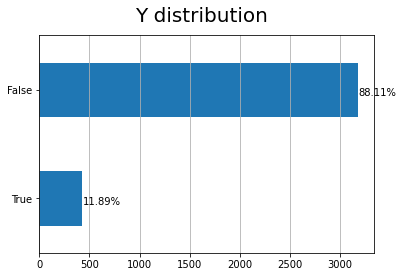

In [332]:
ax = dft['Y'].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle("Y distribution", fontsize=title_size)
plt.show()

☝  Most of Y values are RMA=False, which means, product is fine. This is an anomaly detection problem where most of the products are regular and only a small part is not ok. The data classes are imbalances.

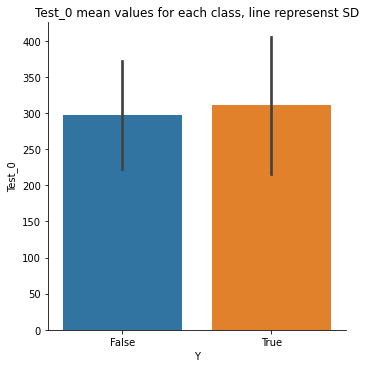

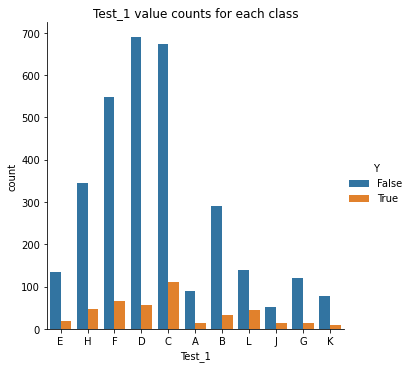

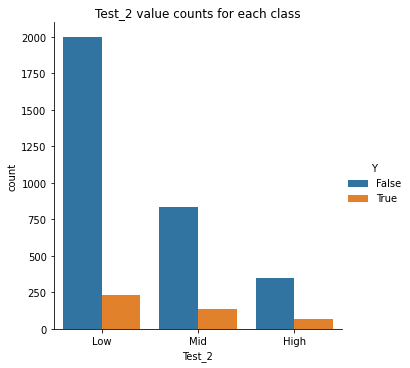

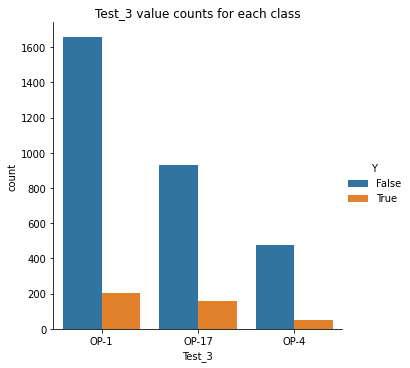

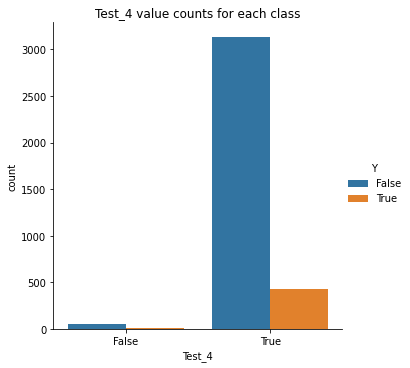

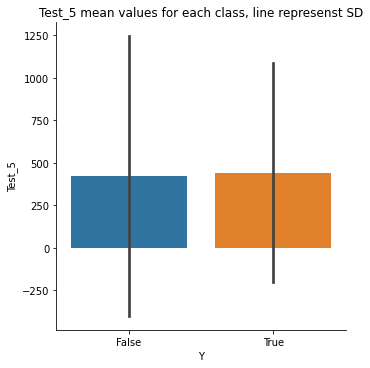

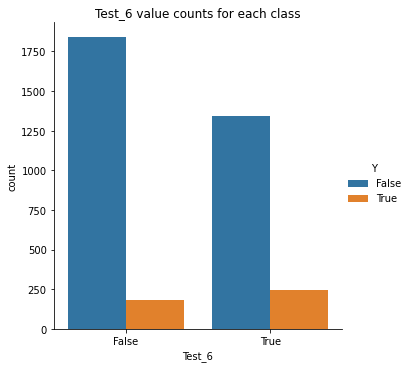

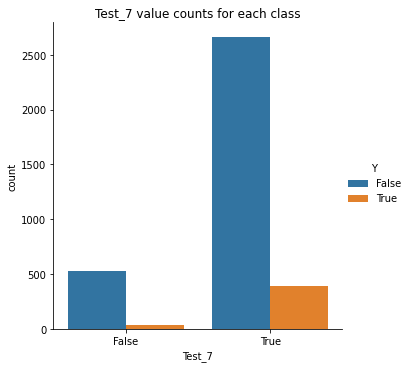

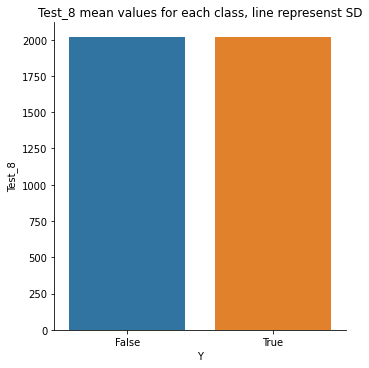

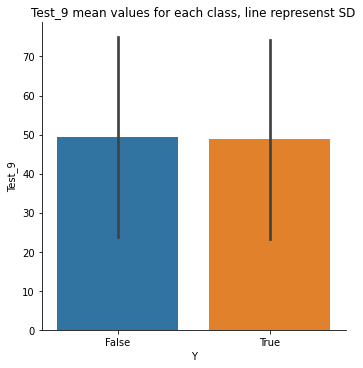

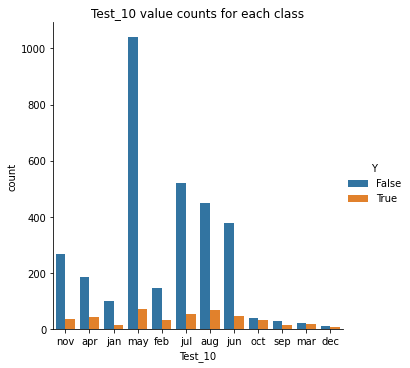

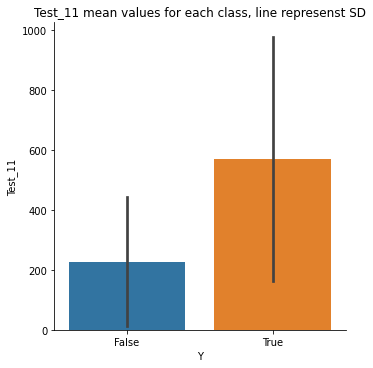

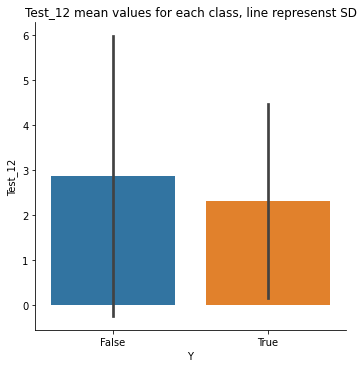

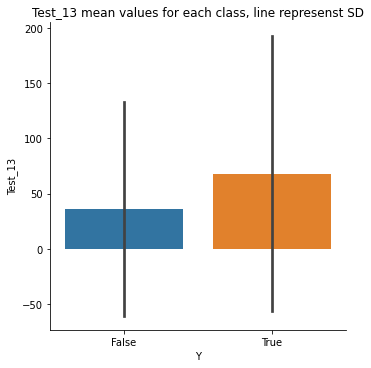

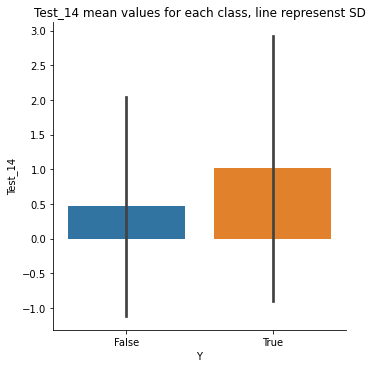

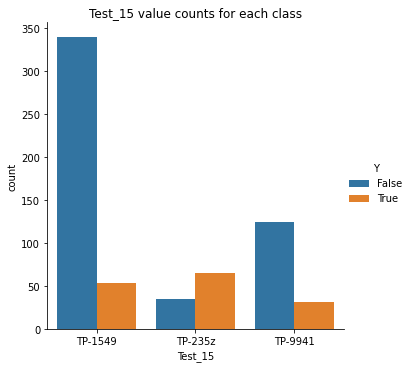

In [333]:
for k,v in dft.dtypes.items():
  if k == 'Y': 
    break 
  if v == "float64" or v == "int64":
    sns.catplot(
    data=dft, kind="bar",
    x="Y", y=k, 
    ci="sd")
    plt.title(k+' mean values for each class, line represenst SD')
  else: 
    sns.catplot(
        x=k, data=dft, 
        kind="count",
         hue="Y")
    plt.title(k+' value counts for each class')

☝  We can visualize the differences between the classes in each feature. Some features demonstrated sensitivity to Y: 6, 11, 15. For other features, Y did not show difference at all: 5, 8, 9. Most of the feautres, however, may show a little difference: 0, 1, 2, 3, 4, 7, 10, 12, 13, 14. 

The 15th columns that is really informative, is also the one that is mostly NaN, so we'll need to fill it.

# Data pre-processing

## Data preprocessing is a key step in Machine Learning Pipeline.

Quality of data directly affects the ability of a model to learn useful information out of it.

Therefore, it is extremely important that we preprocess our data before feeding it into a model.

In this step use your conclusions from the previous phase in order to apply them to the data.

    
**Goal of this phase is prepare RMA data set to be used to build a machine learning model**

In [334]:
print(dft.dtypes)

Test_0     float64
Test_1      object
Test_2      object
Test_3      object
Test_4        bool
Test_5     float64
Test_6        bool
Test_7        bool
Test_8     float64
Test_9     float64
Test_10     object
Test_11      int64
Test_12      int64
Test_13      int64
Test_14      int64
Test_15     object
Y             bool
dtype: object


☝  First I wanted to turn all the non-numeric columns into numeric. 

In [335]:
dft['TP-235z'] = (dft['Test_15'] == 'TP-235z')*1
dft['TP-1549'] = (dft['Test_15'] == 'TP-1549')*1
dft['TP-9941'] = (dft['Test_15'] == 'TP-9941')*1

dft['OP-1'] = (dft['Test_3'] == 'OP-1')*1
dft['OP-17'] = (dft['Test_3'] == 'OP-17')*1
dft['OP-4'] = (dft['Test_3'] == 'OP-4')*1

dft = dft.drop(columns=['Test_15', 'Test_3'])

☝  Since these two columns had only three variables, I decided to use dummie variables. However the test data did not have the same categories, so I did such that there will not be a bug if the category is not found. 

In [336]:
dft['Test_1'] = dft['Test_1'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
dft['Test_2'] = dft['Test_2'].replace(['Low', 'Mid', 'High'], [1, 2, 3])
dft['Test_10'] = dft['Test_2'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], list(range(1,13)))

☝  This varibales are related to numbers. I assumed that ABC can be replaced by the ordere of the letters. Low, mid and high can be replaced with numbers. Regarding the months, first I though to split it into seasons but looking at the data I did not find a pattern, therefore I translated into the numbers. 

In [337]:
dft['Y'] = dft['Y']*1
dft['Test_4'] = dft['Test_4']*1
dft['Test_6'] = dft['Test_6']*1
dft['Test_7'] = dft['Test_7']*1

☝  I changed boolean variables into 0-1 numeric variables. 

In [338]:
print(dft.isnull().sum())

Test_0        0
Test_1       31
Test_2        0
Test_4        0
Test_5        0
Test_6        0
Test_7        0
Test_8     1045
Test_9        0
Test_10       0
Test_11       0
Test_12       0
Test_13       0
Test_14       0
Y             0
TP-235z       0
TP-1549       0
TP-9941       0
OP-1          0
OP-17         0
OP-4          0
dtype: int64


In [339]:
test_1_comm = 3
test_8_mean = 2018

In [340]:
dft['Test_1'] = dft['Test_1'].fillna(test_1_comm)
dft['Test_8'] = dft['Test_8'].fillna(test_8_mean)

☝  Test_1 was filled with the most frequent category, it looks reasonable and there is not much missing values. Test_8 was replaced by mean since I did not see differences between the classes. 

# Build a ML/DL model

Build any model/s you find useful to solve the task and evaluate its performance results.

Use the metric f1_score imported above to measure the performance of your model. (positive class is RMA unit (RMA = True))

It is recommended to try different models and techniques and compare the results

- Outcome of this phase can be but not limited to:

  -	Train model/s on data set you prepared in previous phase
  -	Features engineering
  -	Features selection
  -	Hyper-parameters optimization
  -	Model/s results evaluation including performance metric value


**Goal of this phase is to see your machine learning experimentation skills toward achieving as best model/s as you can**

In [341]:
X = dft.drop(columns='Y')
y = dft['Y']

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

In [342]:
models_results = pd.DataFrame(columns=['Metric', 'Score', 'Model'])
models = {}

In [343]:
def train_test_eval(model_name, model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  print('\033[1m' + 'Model'+'\033[0m')
  display(model)
  print()

  # test 
  results = evaluate_model(model, X_test, y_test)

  # show result
  print('\033[1m' + 'Results'+'\033[0m')
  cm_pos = list(results['Metric'].values()).index('cm')
  plot_confusion_matrix(results['Score'][cm_pos], model_name)

  # save results 
  #del results['Metric'][cm_pos]
  #del results['Score'][cm_pos]

  res_df = pd.DataFrame(results)
  res_df.insert(2, "Model", model_name)
  display(res_df)
  return res_df

In [344]:
def evaluate_model(model, X_test, y_test):

    y_pred = model.predict(X_test)

    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    if  hasattr(model, 'name'): 
      if model.name == 'LinearSVC': 
        y_pred_proba = model.decision_function(X_test) 
    else: 
      y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    cm = metrics.confusion_matrix(y_test, y_pred)

    results = {'Metric': {0: 'Accuracy', 1: 'Precision', 2: 'Recall', 3: 'F1', 4: 'Kappa', 5: 'fpr', 6: 'tpr', 7: 'AUC', 8: 'cm'}, 
               'Score': {0: acc, 1: prec, 2: rec, 3: f1, 4: kappa, 5: [fpr],  6: [tpr], 7: auc, 8: cm}} 
    return results

In [345]:
cmaps = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

def plot_confusion_matrix(cm, classifier):

  classes = ['True', 'False']
  fig, ax = plt.subplots()
  sns.heatmap(cm, annot=True, fmt='d', cmap=random.choice(cmaps), cbar=False)
  ax.set(xlabel="Predicted", ylabel="True", title=f"Confusion Matrix - {classifier}")
  ax.set_yticklabels(labels=classes, rotation=0)
  ax.set_xticklabels(labels=classes)
  plt.show()

Model


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()


Results


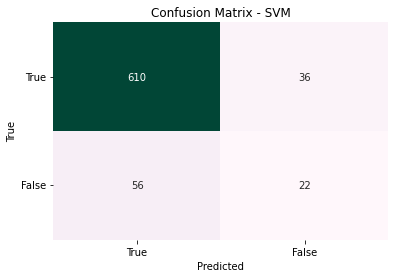

,Metric,Score,Model
0,Accuracy,0.872928,SVM
1,Precision,0.37931,SVM
2,Recall,0.282051,SVM
3,F1,0.323529,SVM
4,Kappa,0.255077,SVM
5,fpr,"[[0.0, 0.0, 0.0030959752321981426, 0.003095975...",SVM
6,tpr,"[[0.0, 0.01282051282051282, 0.0128205128205128...",SVM
7,AUC,0.82865,SVM
8,cm,"[[610, 36], [56, 22]]",SVM


In [346]:
model = svm.LinearSVC()
model.name = 'LinearSVC'
models['SVM'] = model
results = train_test_eval('SVM', model, X_train, Y_train, X_validation, Y_validation)
models_results = models_results.append(results)

Model


SGDClassifier(loss='log')


Results


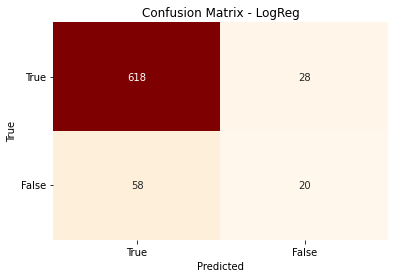

,Metric,Score,Model
0,Accuracy,0.881215,LogReg
1,Precision,0.416667,LogReg
2,Recall,0.25641,LogReg
3,F1,0.31746,LogReg
4,Kappa,0.256425,LogReg
5,fpr,"[[0.0, 0.043343653250773995, 1.0]]",LogReg
6,tpr,"[[0.0, 0.2564102564102564, 1.0]]",LogReg
7,AUC,0.606533,LogReg
8,cm,"[[618, 28], [58, 20]]",LogReg


In [347]:
model = linear_model.SGDClassifier(loss='log')
models['LogReg'] = model
results = train_test_eval('LogReg', model, X_train, Y_train, X_validation, Y_validation)
models_results = models_results.append(results)

Model


DecisionTreeClassifier()


Results


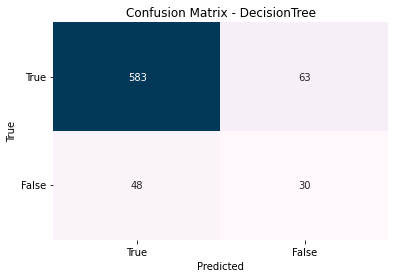

,Metric,Score,Model
0,Accuracy,0.846685,DecisionTree
1,Precision,0.322581,DecisionTree
2,Recall,0.384615,DecisionTree
3,F1,0.350877,DecisionTree
4,Kappa,0.264712,DecisionTree
5,fpr,"[[0.0, 0.09752321981424149, 1.0]]",DecisionTree
6,tpr,"[[0.0, 0.38461538461538464, 1.0]]",DecisionTree
7,AUC,0.643546,DecisionTree
8,cm,"[[583, 63], [48, 30]]",DecisionTree


In [348]:
model = tree.DecisionTreeClassifier()
models['DecisionTree'] = model
results = train_test_eval('DecisionTree', model, X_train, Y_train, X_validation, Y_validation)
models_results = models_results.append(results)

Model


RandomForestClassifier()


Results


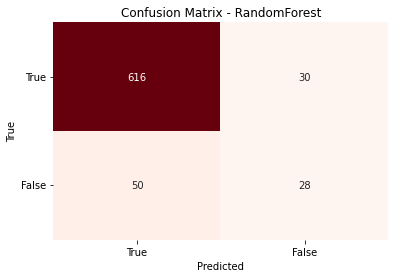

,Metric,Score,Model
0,Accuracy,0.889503,RandomForest
1,Precision,0.482759,RandomForest
2,Recall,0.358974,RandomForest
3,F1,0.411765,RandomForest
4,Kappa,0.352241,RandomForest
5,fpr,"[[0.0, 0.0, 0.0, 0.0015479876160990713, 0.0015...",RandomForest
6,tpr,"[[0.0, 0.01282051282051282, 0.0256410256410256...",RandomForest
7,AUC,0.847404,RandomForest
8,cm,"[[616, 30], [50, 28]]",RandomForest


In [349]:
model = ensemble.RandomForestClassifier()
models['RandomForest'] = model
results = train_test_eval('RandomForest', model, X_train, Y_train, X_validation, Y_validation)
models_results = models_results.append(results)

Model


GradientBoostingClassifier()


Results


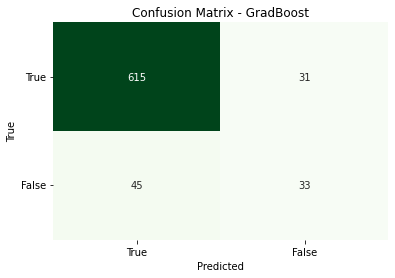

,Metric,Score,Model
0,Accuracy,0.895028,GradBoost
1,Precision,0.515625,GradBoost
2,Recall,0.423077,GradBoost
3,F1,0.464789,GradBoost
4,Kappa,0.407222,GradBoost
5,fpr,"[[0.0, 0.0015479876160990713, 0.00309597523219...",GradBoost
6,tpr,"[[0.0, 0.0, 0.0, 0.0641025641025641, 0.0641025...",GradBoost
7,AUC,0.867627,GradBoost
8,cm,"[[615, 31], [45, 33]]",GradBoost


In [350]:
model = ensemble.GradientBoostingClassifier()
models['GradBoost'] = model
results = train_test_eval('GradBoost', model, X_train, Y_train, X_validation, Y_validation)
models_results = models_results.append(results)

Model


GaussianNB()


Results


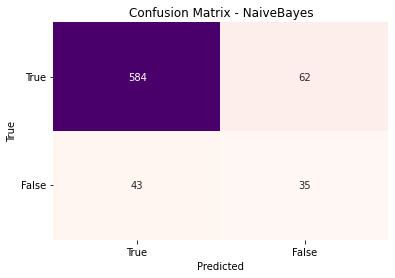

,Metric,Score,Model
0,Accuracy,0.854972,NaiveBayes
1,Precision,0.360825,NaiveBayes
2,Recall,0.448718,NaiveBayes
3,F1,0.4,NaiveBayes
4,Kappa,0.318622,NaiveBayes
5,fpr,"[[0.0, 0.021671826625386997, 0.021671826625386...",NaiveBayes
6,tpr,"[[0.0, 0.16666666666666666, 0.1794871794871795...",NaiveBayes
7,AUC,0.831825,NaiveBayes
8,cm,"[[584, 62], [43, 35]]",NaiveBayes


In [351]:
model = naive_bayes.GaussianNB()
models['NaiveBayes'] = model
results = train_test_eval('NaiveBayes', model, X_train, Y_train, X_validation, Y_validation)
models_results = models_results.append(results)

Model


KNeighborsClassifier()


Results


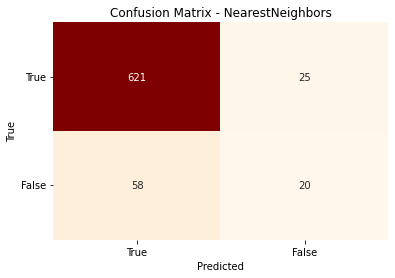

,Metric,Score,Model
0,Accuracy,0.885359,NearestNeighbors
1,Precision,0.444444,NearestNeighbors
2,Recall,0.25641,NearestNeighbors
3,F1,0.325203,NearestNeighbors
4,Kappa,0.267457,NearestNeighbors
5,fpr,"[[0.0, 0.006191950464396285, 0.021671826625386...",NearestNeighbors
6,tpr,"[[0.0, 0.01282051282051282, 0.1153846153846153...",NearestNeighbors
7,AUC,0.749315,NearestNeighbors
8,cm,"[[621, 25], [58, 20]]",NearestNeighbors


In [352]:
model = neighbors.KNeighborsClassifier()
models['NearestNeighbors'] = model
results = train_test_eval('NearestNeighbors', model, X_train, Y_train, X_validation, Y_validation)
models_results = models_results.append(results)

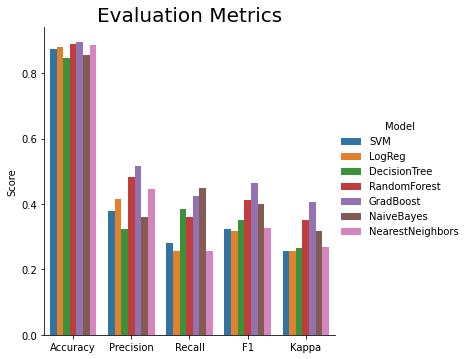

In [353]:
cols_scores = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
data_scores = models_results[models_results['Metric'].isin(cols_scores)]
sn = sns.catplot(
    data=data_scores, kind="bar",
    x="Metric", y="Score", hue="Model",
)
sn.set_axis_labels("", "Score")

plt.title('Evaluation Metrics', fontsize=title_size)

plt.show()

☝  Overall, the models did not bring high results (since the data is imbalanced the accuracy is not infromative, therefore I consider F1). I chose to use random forest. 

# Model Interpretation

**Here is the place to interpret your model**

- Outcome of this phase can be but not limited to:

    - Confusion Matrix
    - Features Importance
    - Business Insights

**Goal of this phase is to interpret your best model/s you found in previous phase** 

In [354]:
my_model = models['RandomForest']
feature_names = X_train.columns

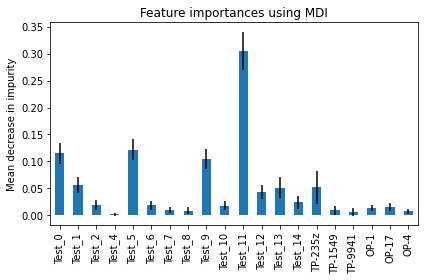

In [355]:
importances = my_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in my_model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

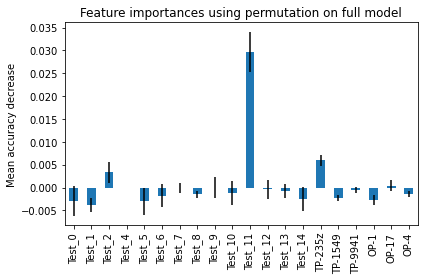

In [356]:
result = permutation_importance(
    my_model, X_validation, Y_validation, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

☝ The main insight is that Test_11 is very improtant, this is also emphasized by the statistics at the begenning. Also TP-235z is improtant, which means that it'll be smart to find a good way for interpulation (prediction) of this variable, that I didn't do. 

As for business, I would advice to watch that variables and maybe try to gather some more data. 

# Something to think about:

- Why f1_score is the selected metric?
- Are there metrics that you think would better suit this Use-Case?
- What metrics are not appropriate for such a Use-Case?

☝ We should remember that in our data, and usually for anomaly detection problem, 
the classes are highly imbalanced where the interesting calss (the anoamlies) is much samller than the other class. Therefore even a very "stupid" model which only says 0 will be right in most cases. 

Because of that, we can't be satisfied with the accuracy result. 

So we can investigate precision and reall, but it's easier to have only one measure that evaluates the model. F1 is a good idea since it's a harmonic average of precision and reall, and you don't need to have balanced classes. I also calculated Cohen's kappa that is similar but also takes into account chance and was typically lower. 


# Predict on the test-set and export the model

In [357]:
def clean(dft):
  dft['TP-235z'] = (dft['Test_15'] == 'TP-235z')*1
  dft['TP-1549'] = (dft['Test_15'] == 'TP-1549')*1
  dft['TP-9941'] = (dft['Test_15'] == 'TP-9941')*1
  dft['OP-1'] = (dft['Test_3'] == 'OP-1')*1
  dft['OP-17'] = (dft['Test_3'] == 'OP-17')*1
  dft['OP-4'] = (dft['Test_3'] == 'OP-4')*1
  dft = dft.drop(columns=['Test_15', 'Test_3'])
  dft['Test_1'] = dft['Test_1'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
  dft['Test_2'] = dft['Test_2'].replace(['Low', 'Mid', 'High'], [1, 2, 3])
  dft['Test_10'] = dft['Test_2'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], list(range(1,13)))
  dft['Test_4'] = dft['Test_4']*1
  dft['Test_6'] = dft['Test_6']*1
  dft['Test_7'] = dft['Test_7']*1
  dft['Test_1'] = dft['Test_1'].fillna(test_1_comm)
  dft['Test_8'] = dft['Test_8'].fillna(test_8_mean)
  return dft 

In [358]:
df_clean = clean(df_rma_test)

In [359]:
my_prediction = my_model.predict(df_clean)
pd.DataFrame(my_prediction).to_csv('my_prediction.csv', index = False)
with open('my_model.pkl', 'wb') as f:
    pickle.dump(my_model, f)

**Well done!!**

Congratulations!!! You are almost done. Please,pack your notebook, model and prediction file in one zip file and send us back through the e-mail which you received the assignment from.